In [2]:
import pandas as pd
df=pd.read_csv('houseprice.csv.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df.shape

(1201, 10)

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null object
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null object
LotShape       1201 non-null object
YearBuilt      1201 non-null int64
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [5]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [6]:
import datetime
datetime.datetime.now().year


2022

In [7]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']
df.drop("YearBuilt",axis=1,inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [8]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [9]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [11]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,19
1,0,3,80.0,9600,1,3,1262,0,181500,46
2,5,3,68.0,11250,1,0,920,866,223500,21
3,6,3,60.0,9550,1,0,961,756,140000,107
4,5,3,84.0,14260,1,0,1145,1053,250000,22
5,4,3,85.0,14115,1,0,796,566,143000,29
6,0,3,75.0,10084,1,3,1694,0,307000,18
8,4,4,51.0,6120,1,3,1022,752,129900,91
9,14,3,50.0,7420,1,3,1077,0,118000,83
10,0,3,70.0,11200,1,3,1040,0,129500,57


In [13]:
import numpy as np

In [14]:
### Stacking and Converting Into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features
             

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [15]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [16]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [17]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [18]:
cont_values.dtype

torch.float32

In [19]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null int32
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null int32
LotShape       1201 non-null int32
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
Total Years    1201 non-null int64
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [21]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [22]:
len(df['MSSubClass'].unique())

15

In [23]:
#### Embedding Size For Categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [24]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [26]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [27]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [28]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
embedding_val

[tensor([[-1.5798,  2.6042,  0.0131,  ..., -0.9419, -1.3476, -0.5669],
         [ 2.2084, -1.5425, -1.9172,  ..., -0.7856, -0.7842,  0.2839],
         [-1.5798,  2.6042,  0.0131,  ..., -0.9419, -1.3476, -0.5669],
         ...,
         [-0.4133, -0.6645, -1.2177,  ..., -1.6774,  1.7426, -0.2790],
         [ 2.2084, -1.5425, -1.9172,  ..., -0.7856, -0.7842,  0.2839],
         [ 2.2084, -1.5425, -1.9172,  ..., -0.7856, -0.7842,  0.2839]],
        grad_fn=<EmbeddingBackward>),
 tensor([[-1.5852,  0.1240, -0.5129],
         [-1.5852,  0.1240, -0.5129],
         [-1.5852,  0.1240, -0.5129],
         ...,
         [-1.5852,  0.1240, -0.5129],
         [-1.5852,  0.1240, -0.5129],
         [-1.5852,  0.1240, -0.5129]], grad_fn=<EmbeddingBackward>),
 tensor([[2.1585],
         [2.1585],
         [2.1585],
         ...,
         [2.1585],
         [2.1585],
         [2.1585]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.2264, -0.6486],
         [-1.2264, -0.6486],
         [-0.7791, -1.2182],
  

In [29]:
z = torch.cat(embedding_val, 1)
z

tensor([[-1.5798,  2.6042,  0.0131,  ...,  2.1585, -1.2264, -0.6486],
        [ 2.2084, -1.5425, -1.9172,  ...,  2.1585, -1.2264, -0.6486],
        [-1.5798,  2.6042,  0.0131,  ...,  2.1585, -0.7791, -1.2182],
        ...,
        [-0.4133, -0.6645, -1.2177,  ...,  2.1585, -1.2264, -0.6486],
        [ 2.2084, -1.5425, -1.9172,  ...,  2.1585, -1.2264, -0.6486],
        [ 2.2084, -1.5425, -1.9172,  ...,  2.1585, -1.2264, -0.6486]],
       grad_fn=<CatBackward>)

In [30]:
#### Implement dropupout
droput=nn.Dropout(.4)
final_embed=droput(z)
final_embed

tensor([[-0.0000,  4.3404,  0.0218,  ...,  0.0000, -2.0440, -0.0000],
        [ 3.6807, -2.5708, -3.1953,  ...,  3.5976, -2.0440, -1.0810],
        [-2.6330,  0.0000,  0.0218,  ...,  0.0000, -1.2984, -2.0304],
        ...,
        [-0.6889, -0.0000, -2.0295,  ...,  0.0000, -0.0000, -1.0810],
        [ 3.6807, -2.5708, -0.0000,  ...,  3.5976, -2.0440, -1.0810],
        [ 3.6807, -0.0000, -0.0000,  ...,  3.5976, -2.0440, -0.0000]],
       grad_fn=<MulBackward0>)

In [31]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [32]:
len(cont_features)

5

In [33]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)


In [34]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

# Define Loss And Optimizer

In [35]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
df.shape

(1201, 10)

In [36]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [37]:
cont_values.shape

torch.Size([1201, 5])

In [38]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [39]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.78125
Epoch number: 11 and the loss : 200493.4375
Epoch number: 21 and the loss : 200489.15625
Epoch number: 31 and the loss : 200482.609375
Epoch number: 41 and the loss : 200473.265625
Epoch number: 51 and the loss : 200461.359375
Epoch number: 61 and the loss : 200446.390625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.40625
Epoch number: 131 and the loss : 200252.0
Epoch number: 141 and the loss : 200206.609375
Epoch number: 151 and the loss : 200162.25
Epoch number: 161 and the loss : 200112.21875
Epoch number: 171 and the loss : 200059.625
Epoch number: 181 and the loss : 200005.875
Epoch number: 191 and the loss : 199946.28125
Epoch number: 201 and the loss : 199882.046875
Epoch number: 211 and the loss : 199816.0
Epoch number: 

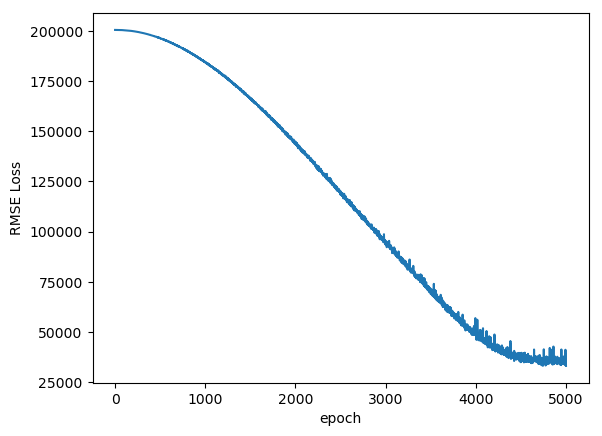

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [41]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 41526.52734375


In [42]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,166954.140625
1,208494.296875
2,150019.156250
3,207114.171875
4,206389.640625
5,213100.171875
6,153655.234375
7,301815.156250
8,159493.156250
9,383977.562500


In [43]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,166954.140625,-36954.140625
1,138887.0,208494.296875,-69607.296875
2,175500.0,150019.156250,25480.843750
3,195000.0,207114.171875,-12114.171875
4,142500.0,206389.640625,-63889.640625


In [45]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')
torch.save(model.state_dict(),'HouseWeights.pt')
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

C:\Users\samat\anaconda3\envs\envpytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FeedForwardNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [46]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [47]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)